<a href="https://colab.research.google.com/github/Hashhhhhhhh/Quantum-Computing-using-Qiskit/blob/main/QSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [42]:
#Creating a dataset for binary classification
rng = np.random.default_rng(42)
n_samples = 10
n_features = 10
X = rng.normal(0, 0.2, size=(n_samples, n_features))

# Shift class 0 and 1 for separability
X[:5, 0:2] -= 0.6   # class 0: move left
X[5:, 0:2] += 0.6   # class 1: move right
# Column names
columns = [f"feature_{i+1}" for i in range(n_features)]
print(columns)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']


In [43]:
#Converting to dataframe and dsiplaying
df = pd.DataFrame(X, columns=columns)
df['label'] = y

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head(10))


First 5 rows of the dataset:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,-0.539057,-0.807997,0.150090,0.188113,-0.390207,-0.260436,0.025568,-0.063249,-0.003360,-0.170609,0
1,-0.424120,-0.444442,0.013206,0.225448,0.093502,-0.171858,0.073750,-0.191777,0.175690,-0.009985,0
2,-0.636972,-0.736186,0.244508,-0.030906,-0.085666,-0.070427,0.106462,0.073089,0.082547,0.086164,0
3,-0.171670,-0.681283,-0.102449,-0.162755,0.123196,0.225794,-0.022789,-0.168031,-0.164896,0.130119,0
4,-0.451349,-0.491369,-0.133102,0.046432,0.023337,0.043738,0.174286,0.044719,0.135783,0.013516,0
5,0.657824,0.726258,-0.291431,-0.063934,-0.094075,-0.127776,-0.055028,0.298988,-0.173166,0.193656,1
6,0.263426,0.533023,0.032551,0.117244,0.142245,0.158669,-0.069745,-0.092470,0.171595,-0.038261,1
7,0.344863,0.373343,-0.183890,0.099432,0.028485,0.138097,-0.085451,0.031708,0.125118,-0.061869,1
8,0.691355,0.467615,-0.072611,-0.076348,-0.239168,0.097394,-0.093880,0.002499,0.096149,0.089306,1
9,0.733077,0.580303,-0.084660,-0.015944,-0.337467,-0.289422,-0.264540,-0.199449,0.079955,-0.181096,1


Shape of dataset: (10, 11)


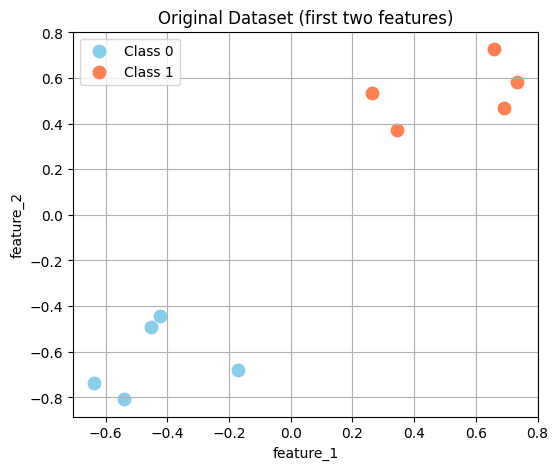

In [44]:
print("Shape of dataset:", df.shape)
# Scatter plot (only feature_1 vs feature_2)
plt.figure(figsize=(6,5))
plt.scatter(df[df.label==0]['feature_1'], df[df.label==0]['feature_2'],
            color='skyblue', label='Class 0', s=80)
plt.scatter(df[df.label==1]['feature_1'], df[df.label==1]['feature_2'],
            color='coral', label='Class 1', s=80)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('Original Dataset (first two features)')
plt.legend()
plt.grid(True)
plt.show()


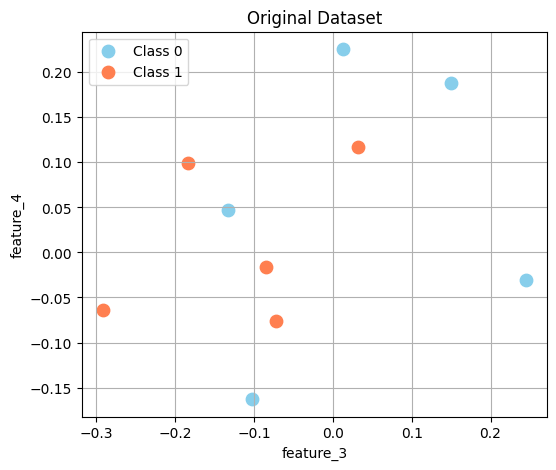

In [45]:
plt.figure(figsize=(6,5))
plt.scatter(df[df.label==0]['feature_3'], df[df.label==0]['feature_4'],
            color='skyblue', label='Class 0', s=80)
plt.scatter(df[df.label==1]['feature_3'], df[df.label==1]['feature_4'],
            color='coral', label='Class 1', s=80)
plt.xlabel('feature_3')
plt.ylabel('feature_4')
plt.title('Original Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
#Introducing a simple quantum kernel
from math import pi, cos, sin
from numpy import kron

def quantum_state(x1, x2):
    # Single-qubit rotation matrices
    Ry1 = np.array([[cos(pi*x1/2), -sin(pi*x1/2)],
                    [sin(pi*x1/2),  cos(pi*x1/2)]], dtype=complex)
    Ry2 = np.array([[cos(pi*x2/2), -sin(pi*x2/2)],
                    [sin(pi*x2/2),  cos(pi*x2/2)]], dtype=complex)

    # Tensor product of two qubits
    U = kron(Ry1, Ry2)
    # Apply CNOT (control=0, target=1)
    CNOT = np.array([[1,0,0,0],
                     [0,1,0,0],
                     [0,0,0,1],
                     [0,0,1,0]], dtype=complex)

    state = CNOT @ U @ np.array([1,0,0,0], dtype=complex)
    return state / np.linalg.norm(state)
    # Build quantum kernel (overlaps squared)
def quantum_kernel_matrix(X2D):
    n = len(X2D)
    K = np.zeros((n, n))
    states = [quantum_state(x[0], x[1]) for x in X2D]
    for i in range(n):
        for j in range(n):
            K[i,j] = abs(np.vdot(states[i], states[j]))**2
    return K

# Using only first 2 features
X2 = df[['feature_1', 'feature_2']].values
# Compute kernel
K_q = quantum_kernel_matrix(X2)

print("Quantum kernel matrix shape:", K_q.shape)
print("\nQuantum kernel matrix (rounded):\n", np.round(K_q, 3))

# Create new "quantum feature" DataFrame
df_q = pd.DataFrame(K_q, columns=[f'q_feature_{i+1}' for i in range(K_q.shape[1])])
df_q['label'] = y
display(df_q.head(10))

Quantum kernel matrix shape: (10, 10)

Quantum kernel matrix (rounded):
 [[1.    0.685 0.964 0.675 0.758 0.051 0.024 0.003 0.022 0.056]
 [0.685 1.    0.718 0.738 0.993 0.001 0.    0.01  0.001 0.   ]
 [0.964 0.718 1.    0.55  0.788 0.088 0.004 0.    0.024 0.069]
 [0.675 0.738 0.55  1.    0.748 0.025 0.066 0.003 0.002 0.004]
 [0.758 0.993 0.788 0.748 1.    0.003 0.    0.004 0.    0.001]
 [0.051 0.001 0.088 0.025 0.003 1.    0.604 0.562 0.841 0.935]
 [0.024 0.    0.004 0.066 0.    0.604 1.    0.923 0.606 0.545]
 [0.003 0.01  0.    0.003 0.004 0.562 0.923 1.    0.716 0.603]
 [0.022 0.001 0.024 0.002 0.    0.841 0.606 0.716 1.    0.965]
 [0.056 0.    0.069 0.004 0.001 0.935 0.545 0.603 0.965 1.   ]]


,q_feature_1,q_feature_2,q_feature_3,q_feature_4,q_feature_5,q_feature_6,q_feature_7,q_feature_8,q_feature_9,q_feature_10,label
0,1.000000,0.685001,0.964157,0.674876,0.757803,0.051290,0.024284,0.002596,0.022066,0.056393,0
1,0.685001,1.000000,0.717675,0.738396,0.992758,0.001157,0.000278,0.010044,0.000617,0.000090,0
2,0.964157,0.717675,1.000000,0.550282,0.788258,0.088023,0.004089,0.000024,0.024086,0.068574,0
3,0.674876,0.738396,0.550282,1.000000,0.748344,0.024988,0.065598,0.003482,0.002448,0.003545,0
4,0.757803,0.992758,0.788258,0.748344,1.000000,0.003273,0.000275,0.004405,0.000205,0.001030,0
5,0.051290,0.001157,0.088023,0.024988,0.003273,1.000000,0.603636,0.561830,0.841486,0.935162,1
6,0.024284,0.000278,0.004089,0.065598,0.000275,0.603636,1.000000,0.923123,0.605804,0.544585,1
7,0.002596,0.010044,0.000024,0.003482,0.004405,0.561830,0.923123,1.000000,0.715958,0.603451,1
8,0.022066,0.000617,0.024086,0.002448,0.000205,0.841486,0.605804,0.715958,1.000000,0.964837,1
9,0.056393,0.000090,0.068574,0.003545,0.001030,0.935162,0.544585,0.603451,0.964837,1.000000,1


In the above case we considered just 2 features and yet after the application of quantum  kernel we got 10 additional features i.e., the 2D feature space we considered has now been mapped to the 10 D hilbert space. We don't actually compute coordinates there. The 10×10 matrix just stores those inner products — it doesn’t define a 10-D coordinate system.

Shape of quantum feature dataset: (10, 11)


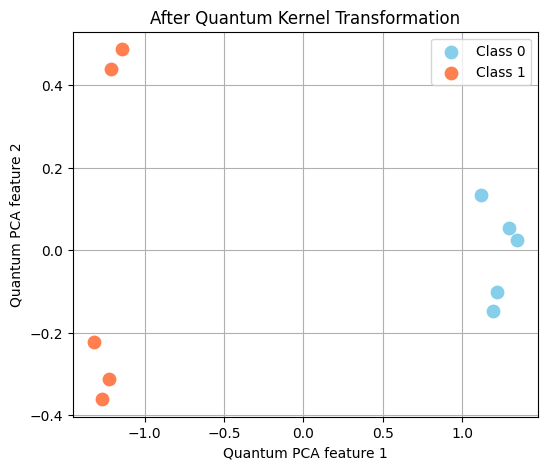

In [51]:
from sklearn.decomposition import PCA

print("Shape of quantum feature dataset:", df_q.shape)

# Reduce quantum features to 2D (from 10 D) for plotting via PCA
pca = PCA(n_components=2)
X_q2D = pca.fit_transform(df_q.drop('label', axis=1))

plt.figure(figsize=(6,5))
plt.scatter(X_q2D[y==0,0], X_q2D[y==0,1], color='skyblue', label='Class 0', s=80)
plt.scatter(X_q2D[y==1,0], X_q2D[y==1,1], color='coral', label='Class 1', s=80)
plt.xlabel('Quantum PCA feature 1')
plt.ylabel('Quantum PCA feature 2')
plt.title('After Quantum Kernel Transformation')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
from sklearn.svm import SVC

# train_labels = your labels for the 10 samples
qsvm = SVC(kernel='precomputed')
qsrv = qsvm.fit(K_q, y)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For demonstration on a small dataset, using the full dataset for evaluation
X_eval = X2
y_eval = y
def quantum_kernel_matrix(X1, X2):
    """
    Compute the quantum kernel matrix between two sets of states:
    X1 : array-like, shape (n1, d)
    X2 : array-like, shape (n2, d)
    """
    n1 = len(X1)
    n2 = len(X2)
    K = np.zeros((n1, n2))
    states1 = [quantum_state(x[0], x[1]) for x in X1]
    states2 = [quantum_state(x[0], x[1]) for x in X2]
    for i in range(n1):
        for j in range(n2):
            K[i, j] = abs(np.vdot(states1[i], states2[j]))**2
    return K


# Compute the quantum kernel matrix for the full dataset
K_eval = quantum_kernel_matrix(X_eval, X_eval)

# Predict on the full dataset
preds = qsvm.predict(K_eval)

# Calculate accuracy
accuracy = accuracy_score(y_eval, preds)
print("QSVM Accuracy on Full Dataset:", accuracy)

QSVM Accuracy on Full Dataset: 1.0


In [50]:
classical_svm = SVC(kernel='rbf').fit(X_train, y_train)
preds_classical = classical_svm.predict(X_test)
accuracy_classical = accuracy_score(y_test, preds_classical)
print(preds_classical)
print("Classical SVM Accuracy:", accuracy_classical)

[1 0]
Classical SVM Accuracy: 1.0
